## Face Landmarks Detection

## Overview
So we have previously worked with face detection using mediapipe library only but there was a problem with detecting the landmarks points as they were not that clear when we were visualizing the other elements of the face i.e. **tha major facial key points** in different angles so to cope up with this problem only we have the alternative method which is to **detect all the landmarks points**, total landmarks points are **468**.

## Real-world application of face mesh

1. **`Iris detection`**: This application can be very useful in the healthcare and for simplicity in this article we will be majorly focusing on eye's landmarks detection only.
2. **`Snapchat's filters`**: So we have often seen a filter that act whenever we change our facial moments so behind that pipeline there is one process that is known as detection of facial landmarks.
3. **`Drowsiness detection`**: This application can be very usefull to detect the driver drowsiness from eye blink detection and yawn detection.

### Import the Libraries

Let's start by importing the required libraries.

In [1]:
import cv2
import itertools
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

### Now we should first initialize the facial landmarks points detection model using mediapipe

So if you have gone through my previous articles related to mediapipe then you must have encountered that the very first step which I do is to initialize the model because that is the mandatory step so for that reason we will do the initialization of **Facial landmarks detection model** here first and for that we will be using the **face_mesh** method of mediapipe's **solutions** class.
In the **face_mesh** method we have our main function which will perform the landmarks detection which is **FaceMesh()** before using this we have to understand about it's arguments first. so let's look into this:

* **`static_image_mode`**: This argument basically takes only two **boolean type** of values which is either True or False. If we will set the argument as **False** then it will detect the frames and not in the manner of images i.e. in the format of video streaming which can be helpful when we will try to detect the facial landmarks in real time but in this case we want to detect the landmarks in the images so for that reason we will be using the **True** as the parameter. **Default value** is **False**.


* **`max_num_faces`**: This argument will specify that how many faces the model should detect in the image or frame at one particular instance i.e in one frame/image the model can detect more than one face, it takes **integer** type of value i.e. **numeric** value and the default value is **1** (only one face to be detected).


* **`min_detection_confidence`**: This argument is basically for setting up the threshold value for the confidence of detection of the model i.e how much our model is confident that in the image/frame it have detected all the landmarks position. The typical range of value it takes is **[0.0,1.0]** and the default value is **0.5** i.e the confidence of detection is set to **50%** confidence.


* **`min_tracking_confidence`**: This argument will be ignored when the **static_image_mode** parameter is set to **True** which is the case for images the default value of this argument is 0.5 i.e 50% confidence of tracking the confidence which also improves the **robustness** of the detection process.


After all these parameter are well defined we will initialize our **drawing** method i.e. **`drawing_styles`** which provides us lots of unique and different styles to detect the landmarks on the images.

In [2]:
mp_face_mesh = mp.solutions.face_mesh

face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils

mp_drawing_styles = mp.solutions.drawing_styles

Code breakdown:

1. As discussed we will first initialize the **`face_mesh`** class from the mediapipe library.
2. Then we will be using the **`FaceMesh`** function with all the relevant features that are already discussed (this one is for **images**).
3. We have discussed about the **drawing_styles** method which would give us some extra styles of drawing the results on the image though for the real implementation of the same we will also have a need of **traditional drawing_utils** too.

### Read an Image

Now we will be using the **`cv2.imread`** function to read the image from the specific path and then we will display the sample image that we will use.

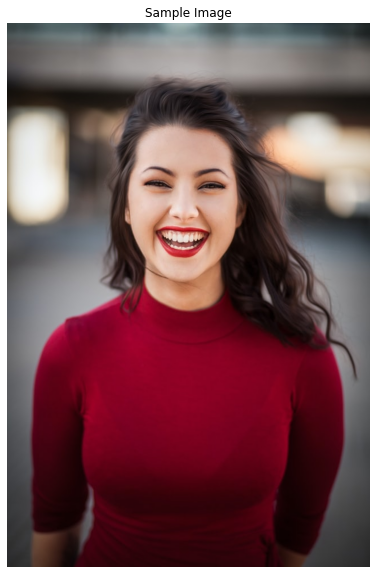

In [3]:
sample_img = cv2.imread('media/sample5.jpg')

plt.figure(figsize = [10, 10])

plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

Code breakdown

1. First we have read the image from the particular path we have to mention the complete path onky if the image is not present in the same folder.
2. Then we will be using the **figure** function of the matplotlib lirary to set the figure size i.e image size.
3. At the last we will **display the image** on which we want to test our facial landmarks detection model.

## Perform Face Landmarks Detection

Now as we have initialize our **face mesh** model using mediapipe library its time to perform the landmarks detection basis on  the previous pre-processing and with the help of **`FaceMesh's`** **process** function we will get the **`468`** facial landmarks points in the image.

In [4]:
face_mesh_results = face_mesh_images.process(sample_img[:,:,::-1])

LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))

if face_mesh_results.multi_face_landmarks:
    
    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):

        print(f'FACE NUMBER: {face_no+1}')
        print('-----------------------')

        print(f'LEFT EYE LANDMARKS:\n')

        for LEFT_EYE_INDEX in LEFT_EYE_INDEXES[:2]:
            
            print(face_landmarks.landmark[LEFT_EYE_INDEX])
            
        print(f'RIGHT EYE LANDMARKS:\n')
        
        for RIGHT_EYE_INDEX in RIGHT_EYE_INDEXES[:2]:
            
            print(face_landmarks.landmark[RIGHT_EYE_INDEX])

FACE NUMBER: 1
-----------------------
LEFT EYE LANDMARKS:

x: 0.53764147
y: 0.29803807
z: 0.003194754

x: 0.5486834
y: 0.29619086
z: 0.00045105713

RIGHT EYE LANDMARKS:

x: 0.40860575
y: 0.29290804
z: 0.0060136393

x: 0.39211136
y: 0.29694256
z: 0.020362636



Code breakdown

1. As discussed we will perform the face landmarks detection using **`process`** function but before that we will be converting the color format of image from BGR to RGB.
2. Now we will store the **left eye** and **right eye** coordinate values in seperate variables using the **`iter tools`** and **chain** method.
3. Before heading towards the main functionality its always a better idea to do some **validations** for that we will first check that whether we have found the faces or not.
4. So, now only if the above statement is correct then only we will **iterate over all the faces** depending on the arguments.
5. Then we will display the face number upon succesfully detection of all the faces.
6. As now we are looking for the landmarks points of **left eye** and **right eye** so we will display the name of them too.
    * First we will iterate over two landmarks points of **left eye**.
    * Then we will do the same for the **right eye** using **for loop**.
7. Then finally we will display the landmarks points but those indexes will be in the normalised form so that ML pipeline behind this detection can give equal weightage to each points.

So by far we have seen the numerical kind of output but that output is not something like a real application because the real application actually shows the output visually so that even the one who don't undertand code and stuff still recognize that the result is correct or not so we will use the values that we have got from previous processing and use them to **draw** the result on the image using **`draw_landmarks()` function** of **drawing_utils** class have a note that we have already initialize our drawing utils class at the beginning.

Before moving forward with code let's first understand the arguments of **draw_landmarks()** function.

* **`image`**: This argument will take the image that will be in the RGB format on which we need to draw the landmarks.
* **`landmarks_list`**: This list will consist of all the landmarks points but in the normalized format.
* **`connection`**: As the name suggest this argument will have the list of arguments that will tell us that how the facial landmarks will be connected to each other when we will draw it on the image.
* **`landmark_drawing_spec`**: This argument set the basic thing of drawing i.e it will select the color, thickness of lines and the circle's radius of the landmarks that will be drawn on the image.
* **`connection_drawing_spec`**: As we have seen that in **connection** argument we have the list of landmarks that will connect other facial points so here we will be setting up the **drawing settings** of the conection lines. 

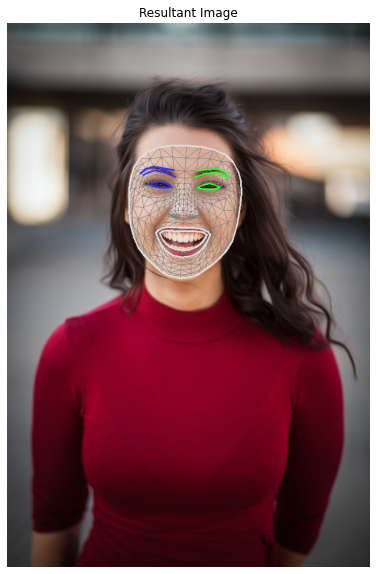

In [5]:
img_copy = sample_img[:,:,::-1].copy()

if face_mesh_results.multi_face_landmarks:
    
    for face_landmarks in face_mesh_results.multi_face_landmarks:

        mp_drawing.draw_landmarks(image=img_copy, 
                                  landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_TESSELATION,
                                  landmark_drawing_spec=None, 
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
        

        mp_drawing.draw_landmarks(image=img_copy, landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_CONTOURS,
                                  landmark_drawing_spec=None, 
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
        
fig = plt.figure(figsize = [10, 10])

plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy);plt.show()

Code breakdown

1. Firstlt we will create the copy of our sample image and convert it into the RGB format because we have to visualiize the result now.
2. Then the process from here seems to be same as we will now first check that whether the faces are found or not and then we will iterate over the faces which we have found.
3. Then we will draw the results or landmarks points on the image and here we will be using the default setting i.e. **face mesh tesselation style** in the **connection** argument.
4. And then for the displaying the **face mesh contours** too we will be using the same default setting.
5. At last we will set the figure/image size and then display all the results on the image.

## Conclusion

So in this article we saw that how we can detect the facial landmarks in the image we can move forward with it by detecting the facial landmarks in the real time also if we want to go for more advance level then we can also create some snapchat like filters to understand its real world application by implementing it. We can also test this application on different images to we just have to change the path of the image in the `read image` section.